In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [247]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [248]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [249]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df.shape

(907, 27)

In [251]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Lets remove some columns those having maximum number of null values.

In [254]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [255]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

Now lets remove unwanted/not required/not so important columns

In [257]:
df.drop(['gppd_idnr','owner','generation_data_source','generation_gwh_2013'],axis=1,inplace=True)

In [258]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [259]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [260]:
df['year_of_capacity_data'].nunique()

1

In [261]:
df['name'].nunique()

907

In [262]:
df.drop(['name','url'],axis=1,inplace=True)

In [263]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [264]:
# Lets fill the geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [265]:
# Now removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [266]:
# Filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [267]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [268]:
df['source'].nunique()

191

In [269]:
df['geolocation_source'].nunique()

3

In [270]:
df['country'].nunique()

1

Dropping columns'country' and 'country_long' because its having India in data.

In [272]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
 12  generation_gwh_2019  907 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

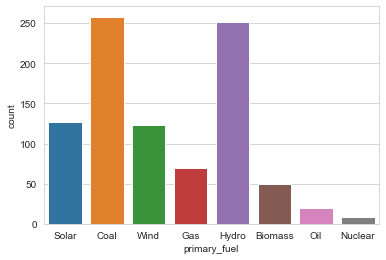

In [274]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [275]:
#EDA
import matplotlib.pyplot as plt
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.200000,59.200,59.200000,59.200000,59.200000,59.2
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.200000,59.200,59.200000,59.200000,59.200000,59.2
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.200000,59.200,59.200000,59.200000,59.200000,59.2
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,59.2
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,59.2


In [276]:
dfcorr=df.corr()

<AxesSubplot:>

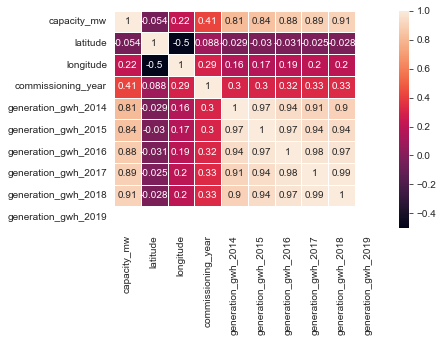

In [277]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

Here we can notice generation_gwh 2014,2015,2016 ,2017 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

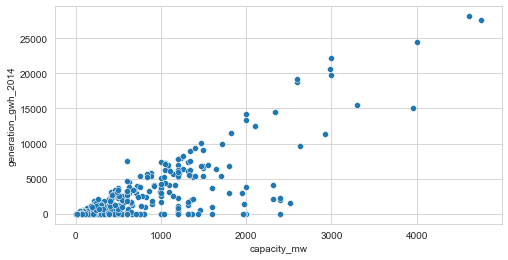

In [279]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

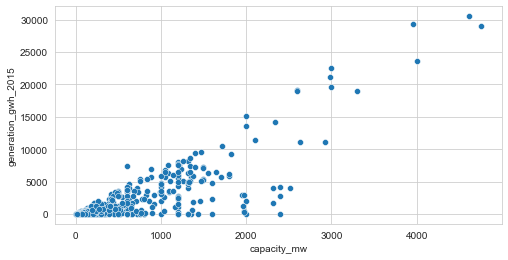

In [281]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

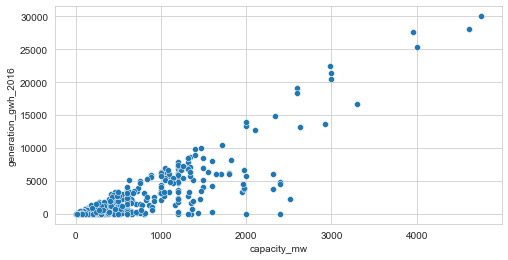

In [283]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

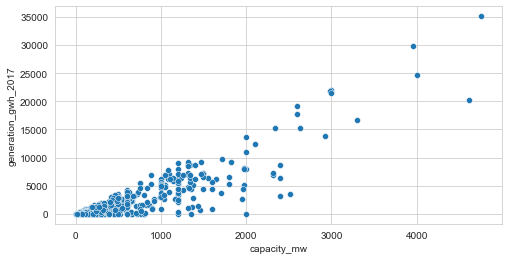

In [285]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

2014 to 2017 genartion of electricity is increasing with capacity.

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

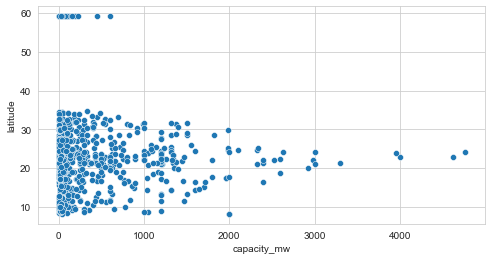

In [287]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

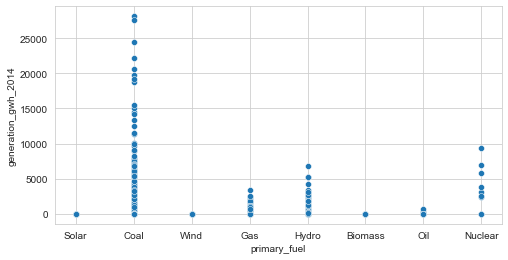

In [288]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

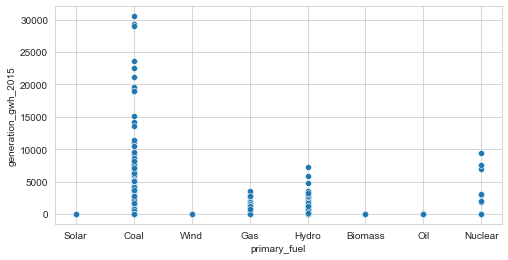

In [290]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

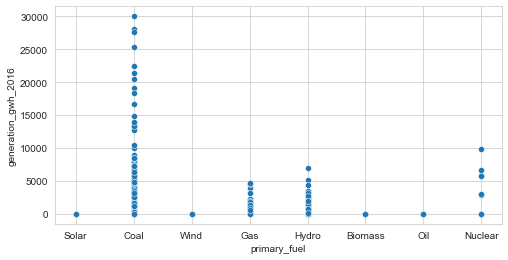

In [291]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

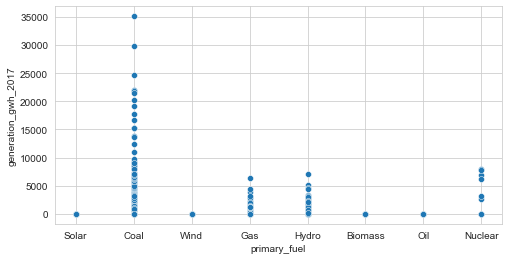

In [292]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

Coal was widely used fuel in 2014 to 2017 and Nuclear,Gas and Hydro were averagely use while Solar,Wind Biomass and oil was very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

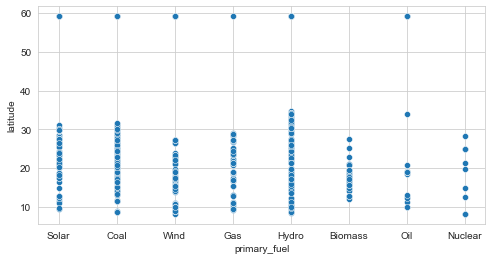

In [294]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

Coal is on max electrical generating capacity in megawatts

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
 12  generation_gwh_2019  907 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.2+ KB


In [298]:
#Using LabelEncoder for convering categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [299]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [300]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [301]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [302]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
 12  generation_gwh_2019  907 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 81.6 KB


In [310]:
#outliers removal
#zscore
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([  4,   4,   4,  12,  12,  12,  12,  43,  43,  43,  43,  56,  60,
        60,  74,  74,  74,  77,  92,  92, 158, 158, 163, 163, 185, 275,
       275, 275, 283, 283, 292, 292, 292, 303, 303, 303, 304, 304, 309,
       313, 328, 328, 328, 346, 358, 358, 358, 358, 360, 360, 360, 360,
       365, 369, 369, 381, 381, 381, 381, 381, 382, 382, 382, 405, 408,
       408, 440, 440, 446, 446, 446, 446, 462, 463, 463, 465, 514, 514,
       514, 514, 514, 522, 522, 531, 552, 552, 552, 565, 565, 584, 605,
       605, 605, 605, 611, 618, 618, 618, 630, 631, 631, 631, 631, 631,
       639, 639, 639, 639, 662, 666, 675, 675, 675, 675, 683, 683, 705,
       718, 718, 720, 723, 723, 765, 765, 765, 769, 769, 769, 796, 796,
       818, 818, 818, 821, 821, 825, 825, 825, 825, 825, 843, 843, 843,
       843, 852, 852, 852, 852, 864, 864, 877], dtype=int64), array([1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 3, 2, 2, 3, 1, 2, 4, 1, 0, 1, 2, 4,
       1, 2, 2, 0, 3, 4, 0, 1, 0, 1, 2, 0, 1, 3, 2, 3, 3, 1, 0, 1, 2, 0,

In [312]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (819, 13)
Shape of the dataframe after removing outliers:  (761, 13)
Percentage of data loss post outlier removal:  7.0818070818070815


In [313]:
df.shape

(761, 13)

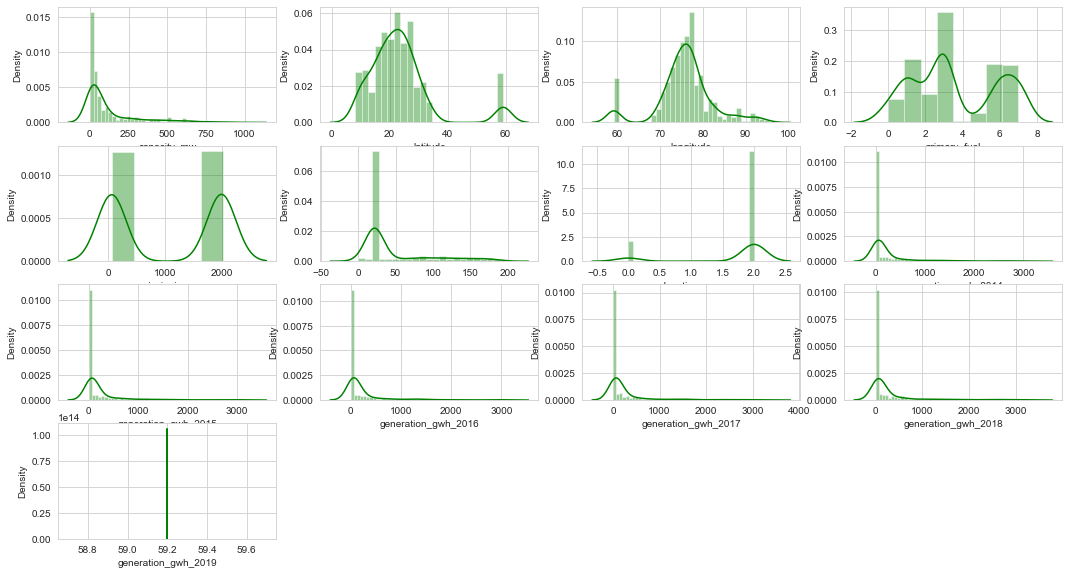

In [315]:
#Skewness Handling
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [316]:
df.skew()

capacity_mw            2.176282
latitude               1.868642
longitude             -0.231704
primary_fuel           0.218055
commissioning_year    -0.007388
source                 1.552575
geolocation_source    -1.868642
generation_gwh_2014    3.115938
generation_gwh_2015    3.302054
generation_gwh_2016    3.245009
generation_gwh_2017    3.065321
generation_gwh_2018    2.977348
generation_gwh_2019    0.000000
dtype: float64

In [ ]:
#skewness more than+/- 0.5 will we treated

#object columns will not be treated

In [318]:
#Removing Skewness
from sklearn.preprocessing import power_transform

df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [319]:
df.skew()

capacity_mw            0.006813
latitude               1.868642
longitude             -0.231704
primary_fuel           0.218055
commissioning_year    -0.007388
source                 1.552575
geolocation_source    -1.868642
generation_gwh_2014    0.022774
generation_gwh_2015    0.032189
generation_gwh_2016    0.042482
generation_gwh_2017    0.038975
generation_gwh_2018    2.977348
generation_gwh_2019    0.000000
dtype: float64

In [320]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [ ]:
#First taking 'capacity_mw' as target creating Regression model
#Dividing data into X and Y

In [321]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [322]:
x.shape

(761, 12)

In [323]:
y.shape

(761,)

In [325]:
#scaling X values
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [326]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [327]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.0
mean,0.298749,0.463335,0.509480,0.495888,0.252556,0.840999,0.550965,0.535297,0.524928,0.522492,0.090335,0.0
std,0.215213,0.176622,0.328183,0.494305,0.250603,0.364115,0.177780,0.179342,0.182668,0.187689,0.173961,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.171406,0.390792,0.285714,0.000000,0.115789,1.000000,0.486878,0.476286,0.464581,0.460636,0.017797,0.0
50%,0.276610,0.465599,0.428571,0.958648,0.115789,1.000000,0.486878,0.476286,0.464581,0.460636,0.017797,0.0
75%,0.370719,0.530927,0.857143,0.989790,0.336842,1.000000,0.613668,0.596689,0.603895,0.596045,0.064147,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [330]:
#MODEL BUILDING:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [332]:
#CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5431627897580691
At random state 0, The test accuracy is: 0.5158278971688415


At random state 1, The training accuracy is: 0.5316137269865469
At random state 1, The test accuracy is: 0.5719938676767973


At random state 2, The training accuracy is: 0.5452432521844351
At random state 2, The test accuracy is: 0.5208077106914486


At random state 3, The training accuracy is: 0.520596869006229
At random state 3, The test accuracy is: 0.6140074483244337


At random state 4, The training accuracy is: 0.5591132255128829
At random state 4, The test accuracy is: 0.4599016452625484


At random state 5, The training accuracy is: 0.5410863795226479
At random state 5, The test accuracy is: 0.5309797047832325


At random state 6, The training accuracy is: 0.5378812161113078
At random state 6, The test accuracy is: 0.5483578528944069


At random state 7, The training accuracy is: 0.5627635412558232
At random state 7, The test accuracy is: 0.443108919821

Random state=95 giving highest accuracy, choosing that as random state


In [334]:
#SPLITTING THE DATA WITH RANDOM STATE =95

In [336]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [337]:
x_train.shape

(555, 12)

In [338]:
x_test.shape

(206, 12)

In [339]:
y_train.shape

(555,)

In [340]:
y_test.shape

(206,)

In [341]:
#Linear Regression:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5361125434136433


In [342]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.4619308201289999
MAE: 0.5152022130524265
r2_score: 0.15076485277527374


In [344]:
#Ridge:

from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.534986621325779


In [345]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.4667023554577033
MAE: 0.5192117989582347
r2_score: 0.1042122067172454


In [347]:
#SVR
#SVR(kernel = 'Linear')
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5234186719949887


In [348]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))


MSE: 0.49100805603180286
MAE: 0.521227848856246
r2_score: 0.12722955729148655


In [350]:
#SVR(kernel='Poly')
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.6844015574818609


In [351]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))


MSE: 0.3726886240928051
MAE: 0.4422764641951786
r2_score: 0.4143230585833756


In [353]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.6736065519874556


In [354]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.353289563305399
MAE: 0.434951332624168
r2_score: 0.4020847104809693


In [356]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9500399511201382


In [357]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.28267631865588017
MAE: 0.39032084519464344
r2_score: 0.5883982760920079


In [359]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9900323341786048


In [360]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.48564938134361996
MAE: 0.5083046561632015
r2_score: 0.4950669459426378


In [362]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8458355838792584


In [363]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.2857301328915459
MAE: 0.39880917215722594
r2_score: 0.5746529573055323


In [366]:
#cross validation
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.477262, 0.086720
R    : 0.476230, 0.086434
svr    : 0.484988, 0.098526
svr_p    : 0.376849, 0.066901
svr_r    : 0.357975, 0.070380
RF    : 0.310977, 0.079553
DTR    : 0.511560, 0.102317
GBR    : 0.295548, 0.071599


According to all metrics score selecting the GradientBoostingRegressoras for GridSeachCV

In [369]:
#HYPER PARAMETER TUNING:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [371]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [372]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [373]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [374]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [375]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.28381250899482013
MAE: 0.3985122571410602
r2_score: 0.578588145230655


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

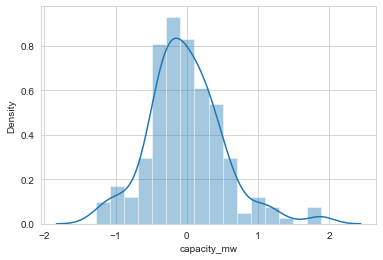

In [376]:
sns.distplot(GF_grid_pred-y_test)

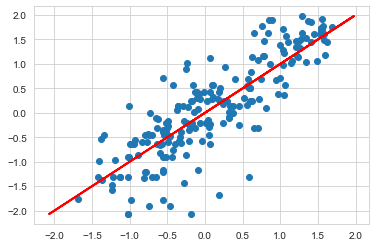

In [377]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

In [387]:
#TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL
#Dividing data into X and Y
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [393]:
x.shape

(761, 12)

In [394]:
y.shape

(761,)

In [396]:
#Spliting Train and Test data
from sklearn.model_selection import train_test_split

In [397]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [398]:
x_train.shape

(555, 12)

In [400]:
x_test.shape

(206, 12)

In [401]:
y_train.shape

(555,)

In [402]:
y_test.shape

(206,)

In [404]:
#MODEL BUILDING:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [407]:
#LogisticRegression
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6228844169246646


In [408]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6553398058252428
[[ 0  1  0  0  0  0 13  2]
 [ 0  6  0 11  0  0 13  4]
 [ 0  1  0 11  0  0  1  0]
 [ 0  1  0 64  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  2  0]
 [ 0  0  2  0  0  0 29  4]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.60      0.18      0.27        34
           2       0.00      0.00      0.00        13
           3       0.71      0.98      0.83        65
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.50      0.83      0.62        35
           7       0.78      1.00      0.88        36

    accuracy                           0.66       206
   macro avg       0.32      0.37      0.33       206
weighted avg       0.55      0.66      0.56       206

Training accuracy:: 0.6162162162162163
Test accuracy:: 0.6553398058252428


In [410]:
#DECISION TREE CLASSIFIER
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8225834193326452


In [411]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8252427184466019
[[14  2  0  0  0  0  0  0]
 [ 3 21  4  5  0  1  0  0]
 [ 0  3  6  2  0  2  0  0]
 [ 0  4  4 55  1  1  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  2  1  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.70      0.62      0.66        34
           2       0.35      0.46      0.40        13
           3       0.87      0.85      0.86        65
           4       0.00      0.00      0.00         1
           5       0.43      0.50      0.46         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        36

    accuracy                           0.83       206
   macro avg       0.65      0.66      0.65       206
weighted avg       0.83      0.83      0.83       206

Training accuracy:: 1.0
Test accuracy:: 0.8252427184466019


In [413]:
#KNeighborsClassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7030099759201927


In [414]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6990291262135923
[[ 9  3  2  0  0  0  2  0]
 [ 5 21  3  4  0  0  1  0]
 [ 1  4  0  5  0  3  0  0]
 [ 0  8  2 55  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  2  0  0  1  0  0]
 [ 1 11  1  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.41      0.62      0.49        34
           2       0.00      0.00      0.00        13
           3       0.86      0.85      0.85        65
           4       0.00      0.00      0.00         1
           5       0.25      0.17      0.20         6
           6       0.88      0.63      0.73        35
           7       1.00      1.00      1.00        36

    accuracy                           0.70       206
   macro avg       0.50      0.48      0.48       206
weighted avg       0.71      0.70      0.70       206

Training accuracy:: 0.781981981981982
Test accuracy:: 0.6990291262135923


In [416]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8554609563123495


In [417]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8495145631067961
[[13  3  0  0  0  0  0  0]
 [ 2 24  2  5  0  1  0  0]
 [ 0  4  4  3  0  2  0  0]
 [ 0  1  4 60  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  0  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.73      0.71      0.72        34
           2       0.31      0.31      0.31        13
           3       0.88      0.92      0.90        65
           4       0.00      0.00      0.00         1
           5       0.50      0.50      0.50         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        36

    accuracy                           0.85       206
   macro avg       0.66      0.66      0.66       206
weighted avg       0.84      0.85      0.85       206

Training accuracy:: 1.0
Test accuracy:: 0.8495145631067961


In [419]:
# ADA BOOST CLASSIFIER
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5743677375256322


In [422]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.6553398058252428
[[ 0  0  0 16  0  0  0  0]
 [ 0  0  0 30  0  0  0  4]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0 65  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  1  0  0 34  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        13
           3       0.49      1.00      0.66        65
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.99        35
           7       0.90      1.00      0.95        36

    accuracy                           0.66       206
   macro avg       0.30      0.37      0.32       206
weighted avg       0.48      0.66      0.54       206

Training accuracy:: 0.6288288288288288
Test accuracy:: 0.6553398058252428


In [423]:
#BAGGING CLASSIFIER
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8554682159945319


In [427]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8495145631067961
[[15  1  0  0  0  0  0  0]
 [ 3 23  3  4  0  1  0  0]
 [ 0  4  3  4  0  2  0  0]
 [ 0  1  3 61  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  2  1  0  2  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.77      0.68      0.72        34
           2       0.27      0.23      0.25        13
           3       0.87      0.94      0.90        65
           4       0.00      0.00      0.00         1
           5       0.40      0.33      0.36         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        36

    accuracy                           0.85       206
   macro avg       0.64      0.64      0.64       206
weighted avg       0.84      0.85      0.84       206

Training accuracy:: 0.990990990990991
Test accuracy:: 0.8495145631067961


In [429]:
#Gradient Boosting classifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.851537935748462


In [430]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8446601941747572
[[12  4  0  0  0  0  0  0]
 [ 5 22  0  5  1  1  0  0]
 [ 0  2  7  3  0  1  0  0]
 [ 0  1  4 60  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  4  0  0  2  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.73      0.65      0.69        34
           2       0.47      0.54      0.50        13
           3       0.88      0.92      0.90        65
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        36

    accuracy                           0.84       206
   macro avg       0.66      0.65      0.65       206
weighted avg       0.84      0.84      0.84       206

Training accuracy:: 1.0
Test accuracy:: 0.8446601941747572


Random Forest Classifier has better efficiency for HYPER PARAMETER TUNING

In [433]:
#HYPER PARAMETER TUNING:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [434]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [435]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8640776699029126


In [436]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [440]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [441]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [442]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8640776699029126


In [444]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.80      0.71      0.75        34
           2       0.40      0.46      0.43        13
           3       0.88      0.92      0.90        65
           4       0.00      0.00      0.00         1
           5       0.50      0.50      0.50         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        36

    accuracy                           0.86       206
   macro avg       0.68      0.68      0.68       206
weighted avg       0.86      0.86      0.86       206

